### FILTER SPASIAL

#### NAMA  : FARHAN DWI PRAMANA
#### NIM   : 2141720125
#### ABSEN : 11

# PRATIKUM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
# Membuat Fungsi Konvolusi
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image



In [4]:
img = cv.imread('/content/drive/MyDrive/img/female.tiff')

img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

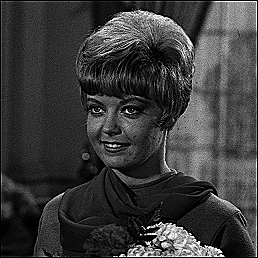

In [42]:
# image sharpen (kernel)

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

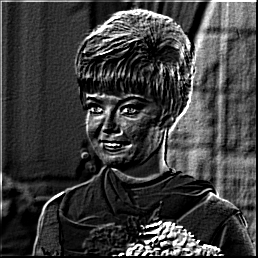

In [6]:
# image emboss (kernel)
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))


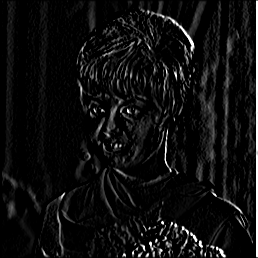

In [7]:
# image Left Sobel Efge Detection (kernel)
kernel_left_sobel_edge_detection = np.array([[1,0,-1],
                                             [2,0,-2],
                                             [1,0,-1]])
cv2_imshow(convolution2d(img_gray,kernel_left_sobel_edge_detection,1,2))


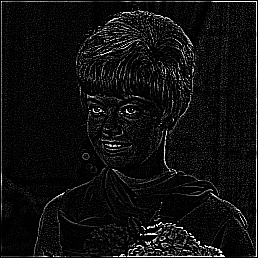

In [8]:
# image Canny Edge (kernel)
kernel_canny_edge = np.array([[-1,-1,-1],
                              [-1,8,-1],
                              [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray,kernel_canny_edge,1,2))


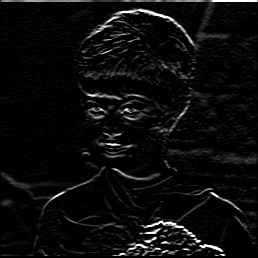

In [9]:
# image Prewit Edge_Detection (kernel)
kernel_prewit_edge_detection = np.array([[-1,-1,-1],
                                         [0,0,0],
                                         [1,1,1]])
cv2_imshow(convolution2d(img_gray,kernel_prewit_edge_detection,1,2))


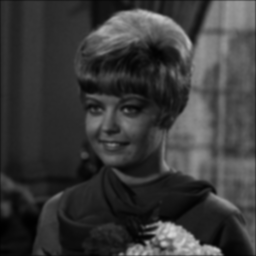

In [10]:
# image 5x5 Gaussian Blur
kernel_5x5_gaussian_blur = 1/256 * np.array([[1,4,6,4,1],
                                             [4,16,24,16,4],
                                             [6,24,36,24,6],
                                             [4,16,24,16,4],
                                             [1,4,6,4,1]])
cv2_imshow(convolution2d(img_gray,kernel_5x5_gaussian_blur,1,2))


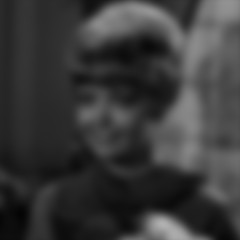

In [11]:
# Image 21x21 Gaussian Blur
kernel_size = 21

sigma = math.sqrt(kernel_size)
gaussian_kernel= cv.getGaussianKernel(kernel_size,sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

# TUGAS
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [56]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

def hist_equalization (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_image = cv.merge(eq_channels)

  return eq_image

def adjust_contrast(image, alpha):
  adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
  return adjusted_image

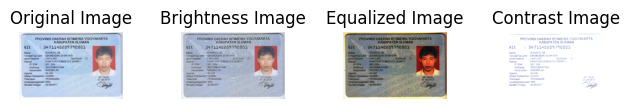

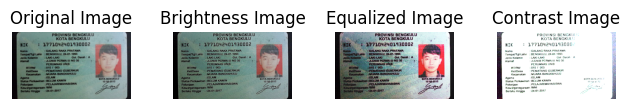

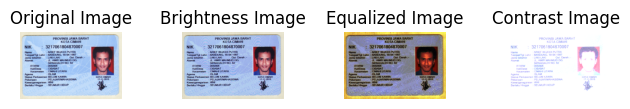

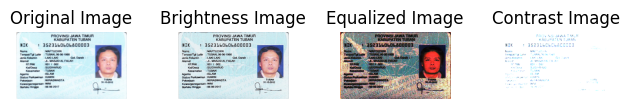

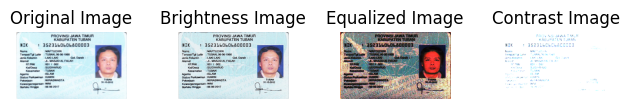

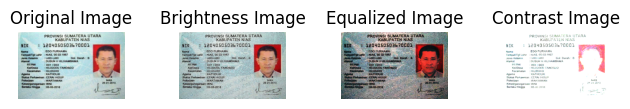

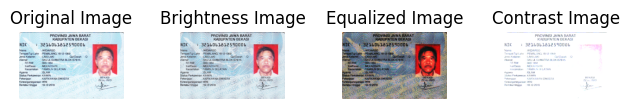

In [57]:
import cv2
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt

# Path folder citra KTP
folder_path = '/content/drive/MyDrive/img/KTP/'

# Membaca daftar file citra dalam folder
image_files = glob.glob(folder_path + '*.png')

# Menggunakan perulangan untuk memproses setiap citra
for i in range(min(7, len(image_files))):  # Mengambil 7 citra atau sebanyak yang tersedia
    # Membaca citra
    ktp = cv2.imread(image_files[i])

    # Meresize citra
    ktp_resized = cv2.resize(ktp, (0, 0), fx=0.5, fy=0.5)

    # Proses kecerahan
    brightness = Brightness(ktp, -10)

    # Proses Adjust Contrast
    contrast = adjust_contrast(ktp, 5)

    # Proses Histogram Equalised
    hist_equ_result = hist_equalization(ktp)

    # Proses sharpening
    result_brightness = cv2.filter2D(brightness, -1, kernel_sharpen)

    # Proses sharpening
    result_contrast = cv2.filter2D(contrast, -1, kernel_sharpen)

    # Proses equalisasi histogram
    result_hist_equ = cv2.filter2D(hist_equ_result, -1, kernel_sharpen)

    # Menggabungkan citra asli, citra hasil, dan menampilkannya
    plt.figure(figsize=(8, 4))
    plt.subplot(4, 4, 1)
    plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(4, 4, 2)
    plt.imshow(cv2.cvtColor(result_brightness, cv2.COLOR_BGR2RGB))
    plt.title('Brightness Image')
    plt.axis('off')

    plt.subplot(4, 4, 3)
    plt.imshow(cv2.cvtColor(result_hist_equ, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(4, 4, 4)
    plt.imshow(cv2.cvtColor(result_contrast, cv2.COLOR_BGR2RGB))
    plt.title('Contrast Image')
    plt.axis('off')

    plt.show()
